In [22]:
import common
import numpy as np

from generate import * 
from filter_kruskal import *

## Generate Graph and calculate reference solution

igraph works best when using there own-Graph data structures (ig.Graph). Kruskal on the other side works best with a sparse adjecency matrix in COO-Format or just the edge list.

To avoid confusion I am usin the following convention:
- g_* for ig.Graph()
- E_* for sparse adjecency matrix

In [23]:
n_nodes = 100
connectivity = 3

base_filename = common.INPUT_DATA_DIR / f"barabasi_{n_nodes}_{connectivity}"

# generate Connected, weithed graph
g = generate_graph(n_nodes=50, connectivity=3)

# calculate reference solution using igraph
g_mst_gt = calculate_mst(g)

# save graph and mst to file
export_graph(g, f"{base_filename}.csv")
export_graph(g_mst_gt, f"{base_filename}_mst_gt.csv")

## Use Kruskal and Filter-Kruskal to calculate MST

In [24]:
# Load graph and reference solution
E = load_graph(f"{base_filename}.csv")
E_MST_gt = load_graph(f"{base_filename}_mst_gt.csv")

In [25]:
# Regular Kruskal
T = pd.DataFrame(dtype=int)
P = UnionFind(len(E))
E, E_MST_kruskal, P = kruskal(E, T, P)

In [26]:
# Filter Kruskal
T = pd.DataFrame(dtype=int)
P = UnionFind(len(E))
E, E_MST_filter_kruskal, P = filter_kruskal(E, T, P)

In [36]:
# verify resutlts
# there is a small random chance that more than 1 MST exists for a given graph
# therefore solution and reference solution might be different
# however both must have the same cost i.e. sum of all weights.
assert E_MST_gt["weight"].sum() == E_MST_kruskal["weight"].sum()
assert E_MST_gt["weight"].sum() == E_MST_filter_kruskal["weight"].sum()

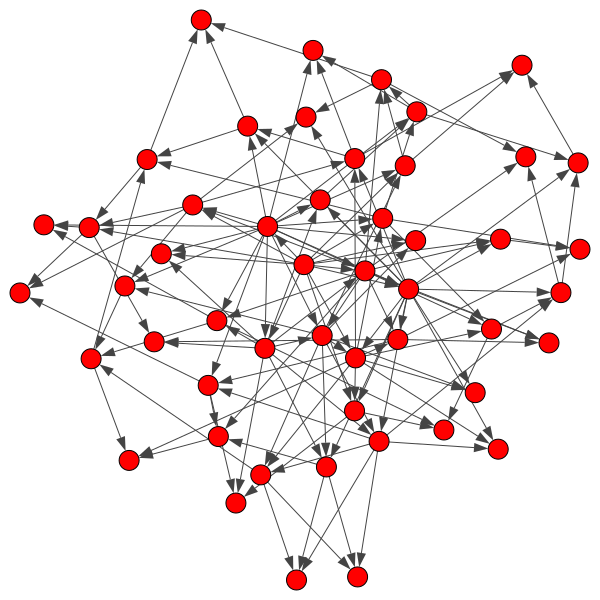

In [ ]:
ig.plot(g)